In [1]:
# Data Wrangling
import pandas as pd
import numpy as np

# Graphics
import matplotlib.pyplot as plt
import matplotlib.font_manager
import matplotlib as mpl
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
import seaborn as sns
from matplotlib_venn import venn2
from wordcloud import WordCloud

# Warning configuration
import warnings
warnings.filterwarnings('ignore')

# Setting directory
import os
os.chdir("C:/Users/j_hor/Documents/Coderhouse/Data Science/Data/Raw")

# Exploratory Data Analysis

In [2]:
# Import dataset
df = pd.read_excel('World Cities - US UK.xlsx')
print(df.shape)
df.head(3)

(198644, 21)


,Geoname ID,Name,ASCII Name,Alternate Names,Latitude,Longitude,Feature Class,Feature Code,Country Code,Country Code 2,...,Admin2 Code,Admin3 Code,Admin4 Code,Population,Elevation,DIgital Elevation Model,Timezone,Modification date,Country,Coordinates
0,5105300,Tenafly,Tenafly,"Tenaflaj,Tenafly,Tienevlie,Tienevly,teneopeull...",40.92538,-73.96292,P,PPL,US,NaN,...,003,72420,NaN,14880,15.0,20,America/New_York,2017-05-23,United States,"40.92538, -73.96292"
1,5105835,Vienna,Vienna,"Cumminstown,Cumminsville,Vienna",40.86871,-74.88906,P,PPL,US,NaN,...,041,33930,NaN,981,173.0,180,America/New_York,2017-05-23,United States,"40.86871, -74.88906"
2,5107419,Asharoken,Asharoken,NaN,40.92788,-73.35984,P,PPL,US,NaN,...,103,37000,NaN,654,4.0,6,America/New_York,2017-05-23,United States,"40.92788, -73.35984"


In [3]:
# Check NA's
df.isnull().sum(axis=0)

Geoname ID                      0
Name                            0
ASCII Name                     17
Alternate Names             35518
Latitude                        0
Longitude                       0
Feature Class                   0
Feature Code                    1
Country Code                   45
Country Code 2             192357
Admin1 Code                    32
Admin2 Code                 31314
Admin3 Code                108470
Admin4 Code                166131
Population                      0
Elevation                  165182
DIgital Elevation Model         0
Timezone                        0
Modification date               0
Country                         0
Coordinates                     0
dtype: int64

In [4]:
# Keep relevant columns. Fortunately they do not have NA´s
df_cities = df[['Name','Latitude','Longitude','Population','Timezone']]
print(df_cities.shape)
df_cities.head(3)

(198644, 5)


,Name,Latitude,Longitude,Population,Timezone
0,Tenafly,40.92538,-73.96292,14880,America/New_York
1,Vienna,40.86871,-74.88906,981,America/New_York
2,Asharoken,40.92788,-73.35984,654,America/New_York


In [7]:
# Define Dataframes for each Timezone
df_uk = df_cities[(df_cities['Timezone'] == 'Europe/London')]
df_us = df_cities[(df_cities['Timezone'] == 'America/New_York') | (df_cities['Timezone'] == 'America/Los_Angeles')]
print(df_uk.shape)
print(df_us.shape)

(5704, 5)
(11165, 5)


In [10]:
# Although it could be more than one city with the same name in the same country, and the graph considers only unique indexes, 
# Venn´s diagram could brings a first approach to the problem

# nunique indexes for each group. Adding the intersection value to the exclusive value of each group is equal to nunique indexes
print(df_uk.Name.nunique())
print(df_us.Name.nunique())

5425
8617


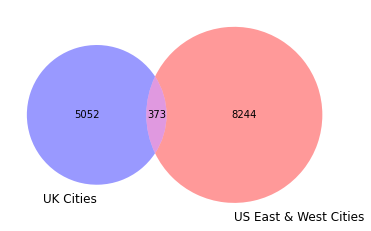

In [9]:
# We could say there are 373 UK names alongside US East & West Coast cities
venn2([set(df_uk.Name), set(df_us.Name)], set_labels=('UK Cities', 'US East & West Cities'), set_colors=('blue', 'red'))
plt.show()

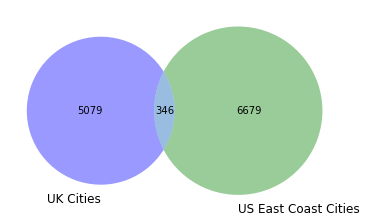

In [17]:
# UK - East Coast first view. We could say there are 346 UK names alongside US East Coast cities
east_coast = df_us[(df_us.Timezone == 'America/New_York')]
venn2([set(df_uk.Name), set(east_coast.Name)], set_labels=('UK Cities', 'US East Coast Cities'), set_colors=('blue', 'green'))
plt.show()

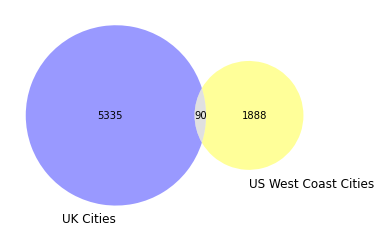

In [19]:
# UK - West Coast first view. We could say there are 90 UK names alongside US East Coast cities
west_coast = df_us[(df_us.Timezone == 'America/Los_Angeles')]
venn2([set(df_uk.Name), set(west_coast.Name)], set_labels=('UK Cities', 'US West Coast Cities'), set_colors=('blue', 'yellow'))
plt.show()

In [29]:
# Create list of unique UK cities and then iterate, marking True/False if they match or not their US counterpart 
uk_cities = df_uk.Name.unique()
df_us['same_name']= df_us.Name.apply(lambda x: x in uk_cities)
df_us

,Name,Latitude,Longitude,Population,Timezone,same_name
0,Tenafly,40.92538,-73.96292,14880,America/New_York,False
1,Vienna,40.86871,-74.88906,981,America/New_York,False
2,Asharoken,40.92788,-73.35984,654,America/New_York,False
3,Bohemia,40.76926,-73.11511,10180,America/New_York,False
4,Carmel,41.43009,-73.68013,4800,America/New_York,False
...,...,...,...,...,...,...
198618,Harrison,40.74649,-74.15626,15474,America/New_York,False
198619,Interlaken,40.23345,-74.01569,808,America/New_York,False
198620,Mercerville,40.23705,-74.68655,13230,America/New_York,False
198621,Middletown,40.39428,-74.11709,65490,America/New_York,False


In [34]:
# Replace True/False for cities with/without UK name
df_us.loc[df_us.same_name==True,'same_name']='City with UK name'
df_us.loc[df_us.same_name==False,'same_name']='City without UK name'
df_us.head()

,Name,Latitude,Longitude,Population,Timezone,same_name
0,Tenafly,40.92538,-73.96292,14880,America/New_York,City without UK name
1,Vienna,40.86871,-74.88906,981,America/New_York,City without UK name
2,Asharoken,40.92788,-73.35984,654,America/New_York,City without UK name
3,Bohemia,40.76926,-73.11511,10180,America/New_York,City without UK name
4,Carmel,41.43009,-73.68013,4800,America/New_York,City without UK name


# Conclusion

In [43]:
# Group all US East and West Coast cities by City with/without UK name
df_us.groupby(by='same_name')['Name'].count()

same_name
City with UK name         883
City without UK name    10282
Name: Name, dtype: int64

In [45]:
# Group US East Coast cities by City with/without UK name
east_coast = df_us[(df_us.Timezone == 'America/New_York')]
east_coast.groupby(by='same_name')['Name'].count()

same_name
City with UK name        782
City without UK name    8319
Name: Name, dtype: int64

In [46]:
# Group US West Coast cities by City with/without UK name
west_coast = df_us[(df_us.Timezone == 'America/Los_Angeles')]
west_coast.groupby(by='same_name')['Name'].count()

same_name
City with UK name        101
City without UK name    1963
Name: Name, dtype: int64

In [47]:
# Conclusion
print('US East Coast Cities with UK names:', len(east_coast[(east_coast.same_name == 'City with UK name')]))
print('US West Coast Cities with UK names:', len(west_coast[(west_coast.same_name == 'City with UK name')]))

US East Coast Cities with UK names: 782
US West Coast Cities with UK names: 101


In [58]:
# The amount of words in the combination of US East Coast cities with UK names indicates there are more US East Coast cities
# with UK names, that do not match exactly (e.g. Newport East)
east_coast = east_coast[(east_coast.same_name == 'City with UK name')]
text = ' '.join(name for name in east_coast.Name)
print ('There are {} words in the combination of names for US East Coast cities with UK names'.format(len(text)))

There are 6861 words in the combination of names for US East Coast cities with UK names


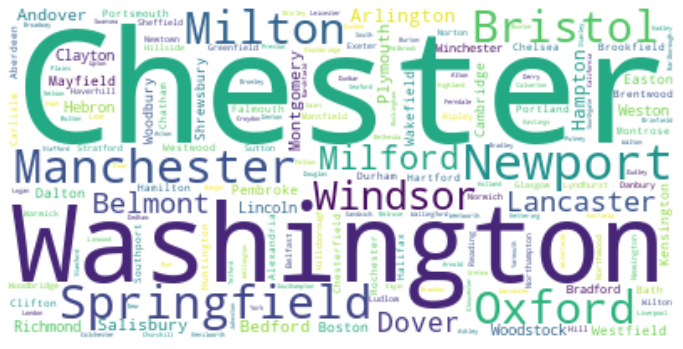

In [51]:
# Wordcloud for East Coast Cities with UK names
wordcloud = WordCloud(max_font_size=100, max_words=300, background_color="white").generate(text)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [57]:
west_coast = west_coast[(west_coast.same_name == 'City with UK name')]
text2 = ' '.join(name for name in west_coast.Name)
print ('There are {} words in the combination of all names for US West Coast cities with UK names'.format(len(text2)))

There are 857 words in the combination of all names for US West Coast cities with UK names


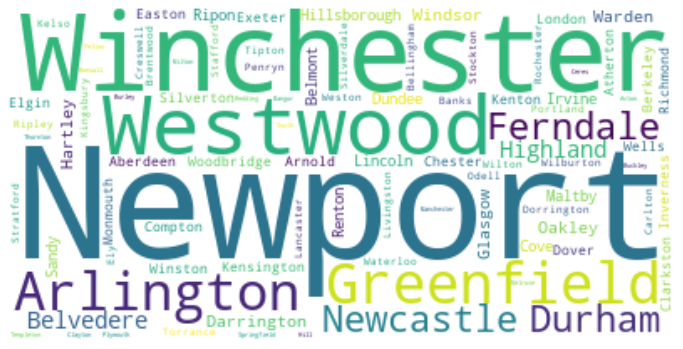

In [54]:
# Wordcloud for West Coast Cities with UK names
wordcloud = WordCloud(max_font_size=100, max_words=300, background_color="white").generate(text2)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [60]:
# Replace Timezone for Coast names
df_us.loc[df_us.Timezone=='America/New_York','Timezone']='East Coast'
df_us.loc[df_us.Timezone=='America/Los_Angeles','Timezone']='West Coast'

In [62]:
df_us.to_csv('C:/Users/j_hor/Documents/Coderhouse/Data Science/Data/Raw.csv',sep=';')